In [1]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 29.9 MB/s eta 0:00:00


In [2]:
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem import Descriptors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import Descriptors

In [3]:
 url_corso= 'https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/bace_regression.csv'

In [4]:
bace = pd.read_csv(url_corso)

#In questo dataset ci sono gia' diversi descrittori, prima provo ad aggiungere solo i nostri se no uso tutti quelli forniti e vedo come va

In [5]:
bace

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [6]:
molecules=[rdkit.Chem.MolFromSmiles(smi) for smi in bace['mol']]

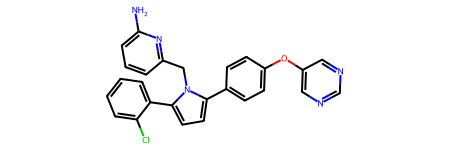

In [7]:
molecules[100]

In [8]:
subset=[x for x in molecules[:30]]

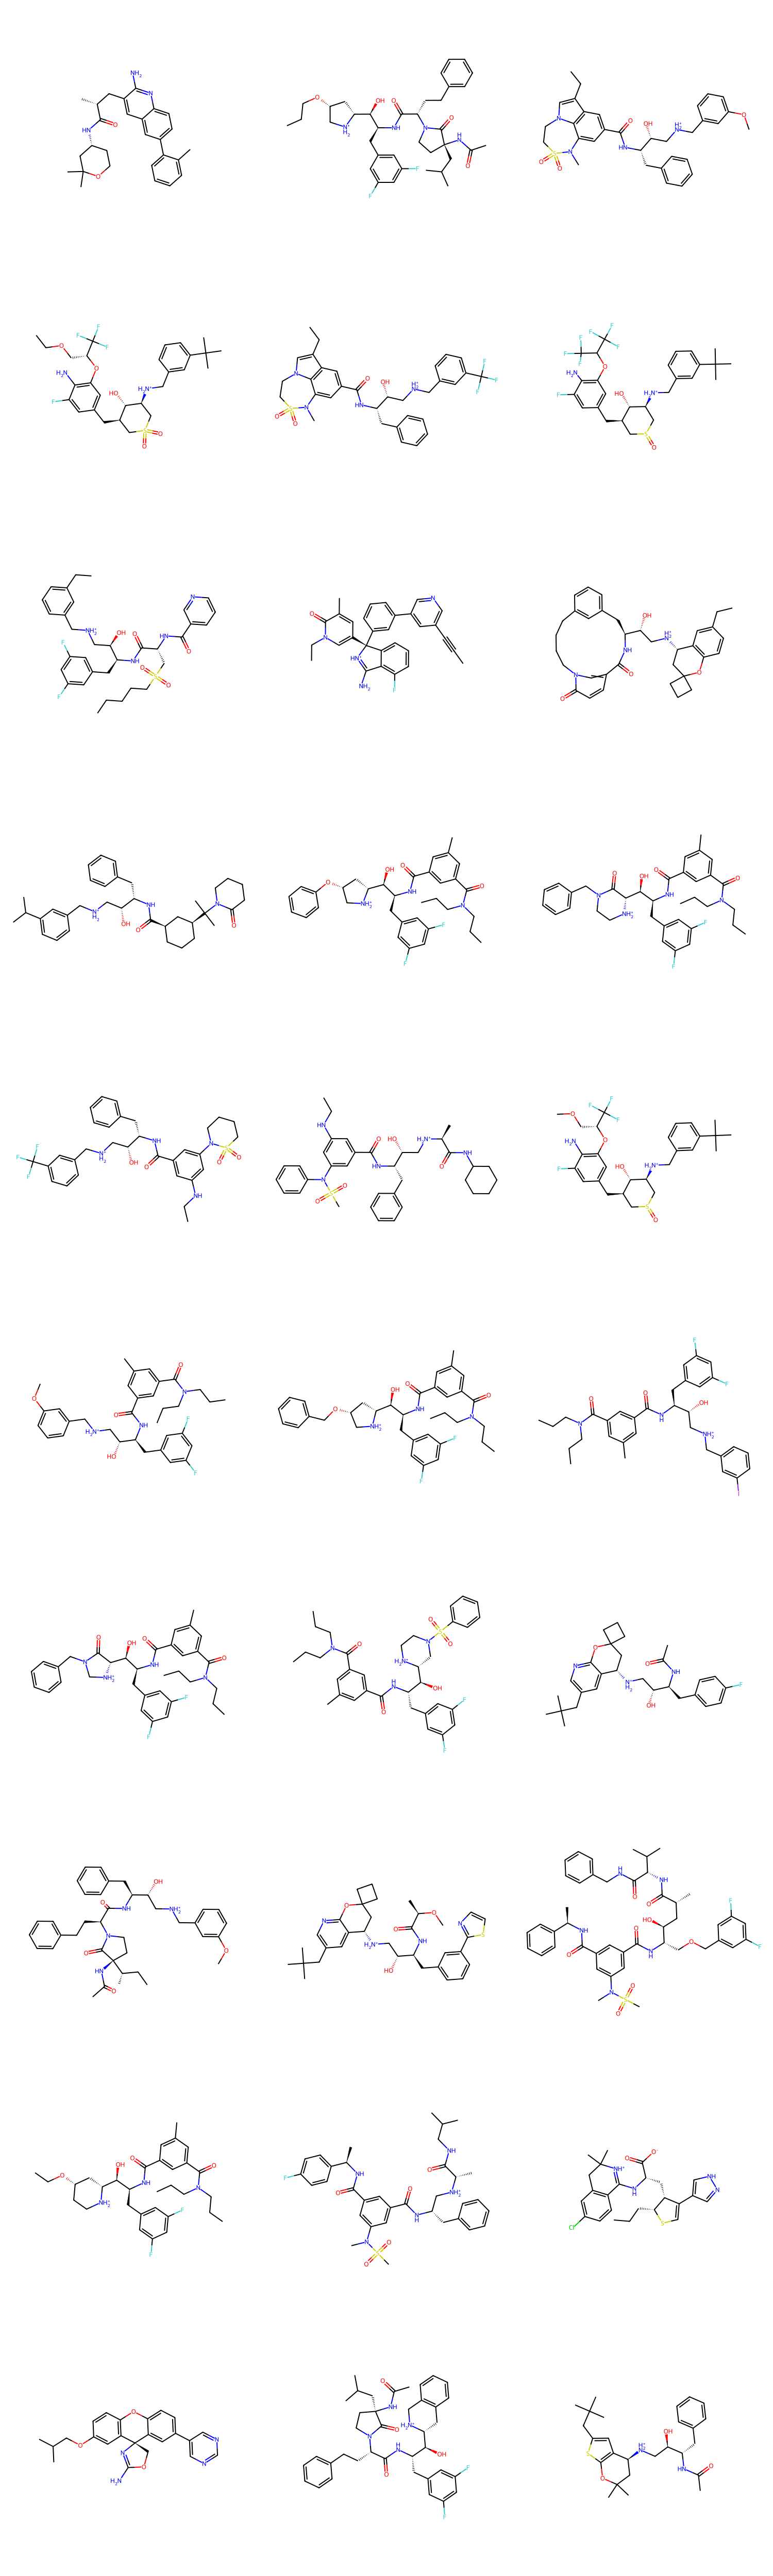

In [9]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=3,subImgSize=(500,500))    
img

In [10]:
valid_mols= [x for x in molecules if x != None]

In [11]:
len (molecules),len(valid_mols)

(1513, 1513)

In [12]:
np.unique(bace['Class'], return_counts=True)

(array([0, 1]), array([822, 691]))

In [13]:
features=pd.DataFrame()
for i,mol in enumerate(molecules):
    features.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features.loc[i,'NumRotafeaturescBonds']=Descriptors.NumRotatableBonds(mol)
    features.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)



In [14]:
features

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro
0,431.580,4.0,2.0,5.0,5.0,0.407407,4.0,77.24,2.0,0.0
1,657.823,5.0,4.0,16.0,11.0,0.583333,4.0,124.58,6.0,0.0
2,591.754,6.0,3.0,11.0,10.0,0.343750,5.0,117.48,2.0,0.0
3,591.688,6.0,3.0,10.0,12.0,0.571429,3.0,115.46,4.0,0.0
4,629.725,5.0,3.0,10.0,12.0,0.343750,5.0,108.25,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1508,364.877,5.0,2.0,6.0,7.0,0.555556,3.0,82.17,1.0,0.0
1509,357.845,5.0,2.0,6.0,7.0,0.277778,3.0,85.83,1.0,0.0
1510,320.190,4.0,1.0,2.0,5.0,0.285714,3.0,60.91,2.0,0.0
1511,317.392,4.0,1.0,3.0,4.0,0.200000,4.0,60.91,2.0,0.0


## MinMaxScaler

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
feature_scaled=pd.DataFrame(MinMaxScaler().fit_transform(features), columns=features.columns)

In [17]:
print(features.max())
print(feature_scaled.max())

MolWt                    1350.495000
NumHAcceptors              18.000000
NumHDonors                 15.000000
NumRotafeaturescBonds      40.000000
NumHeteroatoms             31.000000
FractionCSP3                0.894737
RingCount                   7.000000
TPSA                      525.060000
Stereocenters              12.000000
Spiro                       1.000000
dtype: float64
MolWt                    1.0
NumHAcceptors            1.0
NumHDonors               1.0
NumRotafeaturescBonds    1.0
NumHeteroatoms           1.0
FractionCSP3             1.0
RingCount                1.0
TPSA                     1.0
Stereocenters            1.0
Spiro                    1.0
dtype: float64


In [19]:
correlations =feature_scaled.corr()
correlations

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro
MolWt,1.000000,0.519014,0.759409,0.879481,0.829043,0.386973,0.167946,0.781618,0.679295,-0.067437
NumHAcceptors,0.519014,1.000000,0.268908,0.428949,0.684830,-0.033378,0.159762,0.754515,0.301959,-0.011544
NumHDonors,0.759409,0.268908,1.000000,0.776379,0.621094,0.550565,-0.168954,0.757396,0.669604,-0.145744
NumRotafeaturescBonds,0.879481,0.428949,0.776379,1.000000,0.696972,0.444580,-0.092508,0.739067,0.650599,-0.211595
NumHeteroatoms,0.829043,0.684830,0.621094,0.696972,1.000000,0.216475,-0.008959,0.833119,0.531940,-0.122013
FractionCSP3,0.386973,-0.033378,0.550565,0.444580,0.216475,1.000000,-0.212992,0.272024,0.616996,0.129114
RingCount,0.167946,0.159762,-0.168954,-0.092508,-0.008959,-0.212992,1.000000,-0.060164,-0.019974,0.320455
TPSA,0.781618,0.754515,0.757396,0.739067,0.833119,0.272024,-0.060164,1.000000,0.601368,-0.128943
Stereocenters,0.679295,0.301959,0.669604,0.650599,0.531940,0.616996,-0.019974,0.601368,1.000000,0.043545
Spiro,-0.067437,-0.011544,-0.145744,-0.211595,-0.122013,0.129114,0.320455,-0.128943,0.043545,1.000000


In [20]:
ticks=[x for x  in feature_scaled.columns]

In [21]:
ticks

['MolWt',
 'NumHAcceptors',
 'NumHDonors',
 'NumRotafeaturescBonds',
 'NumHeteroatoms',
 'FractionCSP3',
 'RingCount',
 'TPSA',
 'Stereocenters',
 'Spiro']

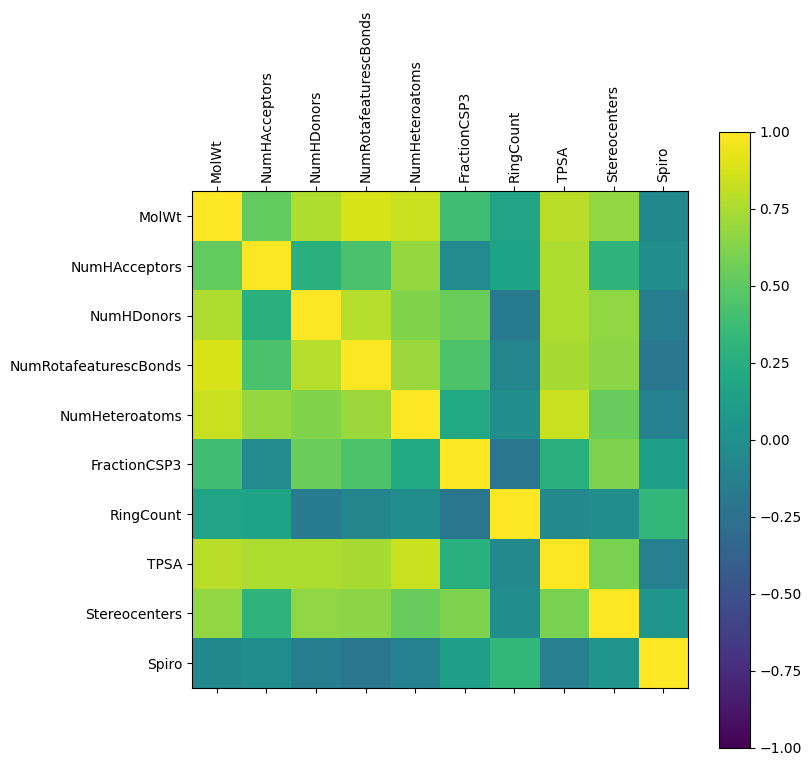

In [22]:
plt.figure(figsize=(8,8))
plt.matshow(np.array(correlations), fignum=0)
plt.xticks(np.linspace(0,9,10),ticks,rotation= 90)
plt.yticks(np.linspace(0,9,10),ticks)
plt.colorbar()
plt.clim((-1,1))


## Test LR

In [23]:
from  sklearn.linear_model import LinearRegression

In [24]:
bace.columns

Index(['mol', 'CID', 'Class', 'Model', 'pIC50', 'MW', 'AlogP', 'HBA', 'HBD',
       'RB',
       ...
       'PEOE6 (PEOE6)', 'PEOE7 (PEOE7)', 'PEOE8 (PEOE8)', 'PEOE9 (PEOE9)',
       'PEOE10 (PEOE10)', 'PEOE11 (PEOE11)', 'PEOE12 (PEOE12)',
       'PEOE13 (PEOE13)', 'PEOE14 (PEOE14)', 'canvasUID'],
      dtype='object', length=595)

In [25]:
y=bace['pIC50']

In [26]:
np.where(bace['Model']=='Train')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [27]:
feature_selected=np.array(feature_scaled)

In [28]:
data_prova=np.concatenate((np.array(bace['pIC50']).reshape(-1,1),feature_selected), axis=1)

In [29]:
np.array(bace['pIC50']).shape

(1513,)

In [30]:
feature_selected.shape

(1513, 10)

In [31]:
feature_selected=feature_selected[:,:1]

In [32]:
bace.columns[5:]

Index(['MW', 'AlogP', 'HBA', 'HBD', 'RB', 'HeavyAtomCount',
       'ChiralCenterCount', 'ChiralCenterCountAllPossible', 'RingCount', 'PSA',
       ...
       'PEOE6 (PEOE6)', 'PEOE7 (PEOE7)', 'PEOE8 (PEOE8)', 'PEOE9 (PEOE9)',
       'PEOE10 (PEOE10)', 'PEOE11 (PEOE11)', 'PEOE12 (PEOE12)',
       'PEOE13 (PEOE13)', 'PEOE14 (PEOE14)', 'canvasUID'],
      dtype='object', length=590)

In [33]:
bace_features=bace.loc[:, bace.columns[5:]]

In [34]:
Xtrain=np.array(bace_features)[np.where(np.array(bace['Model'])=='Train'),:]
Xtest=np.array(bace_features)[np.where(np.array(bace['Model'])=='Test'),:]

In [35]:
Xtrain=np.array(feature_selected)[np.where(np.array(bace['Model'])=='Train'),:]
Xtest=np.array(feature_selected)[np.where(np.array(bace['Model'])=='Test'),:]

In [36]:
Ytrain=np.array(bace['pIC50'])[np.where(np.array(bace['Model'])=='Train')]
Ytest=np.array(bace['pIC50'])[np.where(np.array(bace['Model'])=='Test')]

In [37]:
Xtest=Xtest.reshape(1265,1)
Xtrain=Xtrain.reshape(203,1)


In [38]:
Xtrain.shape

(203, 1)

In [39]:
reg = LinearRegression().fit(Xtest,Ytest)

In [40]:
Y_predict=reg.predict(Xtrain)

In [41]:
Y_test_predict=reg.predict(Xtest)

In [42]:
reg.n_features_in_

1

In [43]:
reg.score(Xtrain,Ytrain)

0.36109079789903775

In [44]:
from sklearn.metrics import  *

In [45]:
mean_squared_error(Ytrain,Y_predict)

1.510640465093255

In [46]:
mean_squared_error(Ytest,Y_test_predict)

1.4207133987643235

In [47]:
Xtrain

array([[0.24201006],
       [0.42863223],
       [0.37413357],
       [0.37407913],
       [0.4054549 ],
       [0.36906224],
       [0.41870899],
       [0.27994028],
       [0.34524068],
       [0.35026582],
       [0.37658263],
       [0.3988757 ],
       [0.39721027],
       [0.42289358],
       [0.34931144],
       [0.36667505],
       [0.38815315],
       [0.44575581],
       [0.38730517],
       [0.42861656],
       [0.28577462],
       [0.41710543],
       [0.37583281],
       [0.58715257],
       [0.34852286],
       [0.42616256],
       [0.27621102],
       [0.21798475],
       [0.43192431],
       [0.26518574],
       [0.45102099],
       [0.30565246],
       [0.39059478],
       [0.25195392],
       [0.34187931],
       [0.20480737],
       [0.30804707],
       [0.23357488],
       [0.35185947],
       [0.24841438],
       [0.37828187],
       [0.24351545],
       [0.364226  ],
       [0.38736704],
       [0.34357526],
       [0.35847415],
       [0.29159824],
       [0.396

In [48]:
print(reg.intercept_, reg.coef_)

5.085683613329559 [5.02204038]


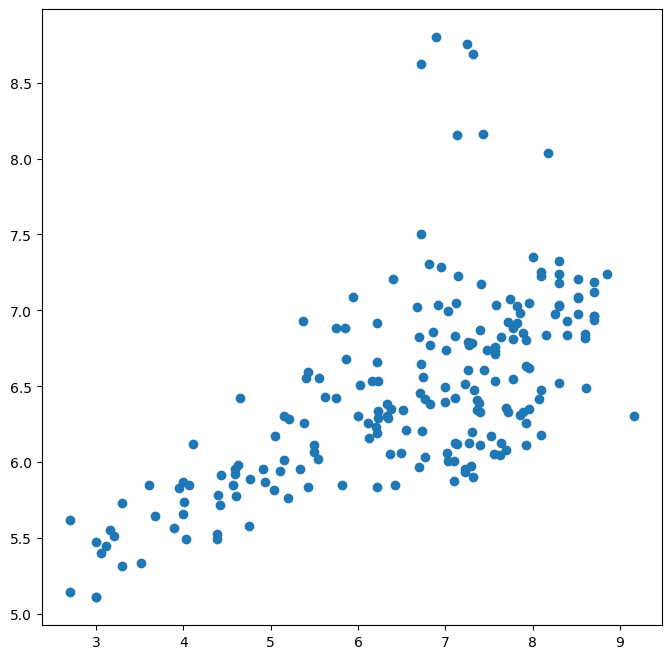

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(Ytrain,Y_predict)
plt.show()


In [50]:
n_features=[1,3,5,8,11]
MSE_training=[1.42,1.38,1.29,1.28,1.27]
MSE_test=[1.51,1.41,1.38,1.38,1.42]

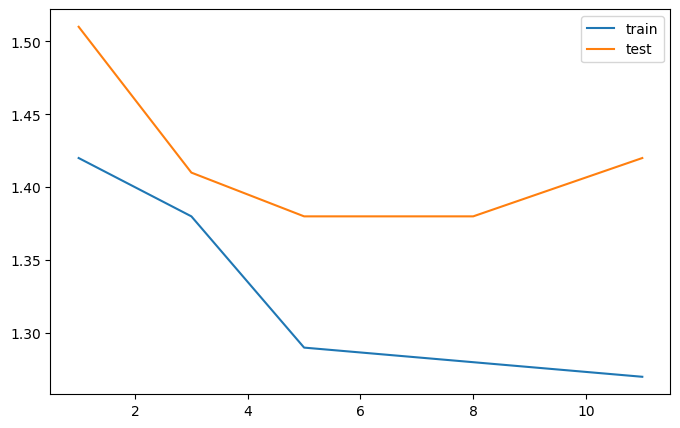

In [51]:
plt.figure(figsize=(8,5))
plt.plot(n_features,MSE_training, label='train')
plt.plot(n_features,MSE_test, label='test')
plt.legend()


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train,test=train_test_split(data_prova,train_size=0.8, test_size=0.2,random_state=1 )

In [54]:
Ytrain=train[:,0]
Xtrain=train[:,1:]

In [55]:
errors=np.empty((8,2))
for i in range (8):
  state=np.random.seed() ##inserire un numero a piacere per fare prove differenti 
  train,test=train_test_split(data_prova,train_size=0.75, test_size=0.25,random_state=state)
  starting_feature=4
  Ytrain=train[:,0]
  Xtrain=train[:,starting_feature:]
  Ytest=test[:,0]
  Xtest=test[:,starting_feature:]
  reg = LinearRegression().fit(Xtrain,Ytrain)
  Y_test_predict=reg.predict(Xtest)
  Y_train_predict=reg.predict(Xtrain)
  errors[i,0]=mean_squared_error(Ytrain,Y_train_predict)
  errors[i,1]=mean_squared_error(Ytest,Y_test_predict)

In [70]:
dati=np.empty((10,2))
for i in range(10):
  train,test=train_test_split(data_prova,train_size=0.75, test_size=0.25,random_state=10)
  Ytrain=train[:,0]
  Xtrain=train[:,i:]
  Ytest=test[:,0]
  Xtest=test[:,i:]
  reg = LinearRegression().fit(Xtrain,Ytrain)
  Y_test_predict=reg.predict(Xtest)
  Y_train_predict=reg.predict(Xtrain)
  dati[i,0]=mean_squared_error(Ytrain,Y_train_predict)
  dati[i,1]=mean_squared_error(Ytest,Y_test_predict)

In [71]:
dati

array([[5.28448112e-29, 5.31409176e-29],
       [1.27619273e+00, 1.42720015e+00],
       [1.34194323e+00, 1.44848808e+00],
       [1.34672062e+00, 1.45441808e+00],
       [1.34684288e+00, 1.45576874e+00],
       [1.34689536e+00, 1.45550902e+00],
       [1.48097018e+00, 1.51465584e+00],
       [1.48339653e+00, 1.51939721e+00],
       [1.56451789e+00, 1.68872802e+00],
       [1.66737778e+00, 1.72187883e+00]])

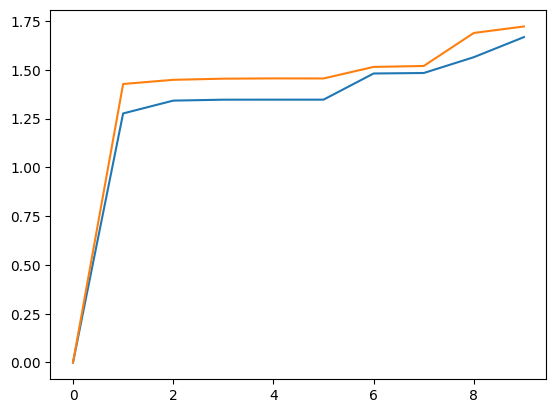

In [73]:
plt.plot(dati[:,0][::1])
plt.plot(dati[:,1][::1])

In [58]:
reg = LinearRegression().fit(Xtest,Ytest)

In [59]:
Y_predict=reg.predict(Xtrain)

In [60]:
Y_test_predict=reg.predict(Xtest)

In [61]:
reg.n_features_in_

2

In [62]:
reg.score(Xtrain,Ytrain)

0.06483010574958847

In [63]:
from sklearn.metrics import  *

In [64]:
mean_squared_error(Ytrain,Y_predict)

1.7202983311392472

In [65]:
mean_squared_error(Ytest,Y_test_predict)

1.570524697167575